# Graphing: date vs. total cases and daily new cases
This is another tutorial that shows how to use Seaborn to plot data accessed through our package. We will create a plot similar to the one in tutorial 2, where the x axis is time and the y axis is number of cases. However, we will just do it for one country, and we will overlay a second line that shows the change in the number of cases each day. This is analogous to the derivative, or rate of change, or the number of cases each day.

In [9]:
import covid19pandas as cod

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime

First, we'll select the data for the country we're looking at.

In [10]:
country = "China"
data_type = "cases"

data = cod.get_data_jhu(data_type=data_type)
data = data[data["Country/Region"] == country] # Select rows for the country we're looking at
data = data[["date", data_type]] # We only need these columns
data = data.groupby("date").aggregate(np.sum) # Sum total cases for each day from all provinces
data = data.reset_index()
data.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
5,2020-01-27,2877
6,2020-01-28,5509
7,2020-01-29,6087
8,2020-01-30,8141
9,2020-01-31,9802


Now we need to calculate the number of new cases each day. This is simply the number of cases on a given day, minus the number of cases the previous day.

In [11]:
temp_col = list(data[data_type])
temp_col = [0] + temp_col[:-1] # Offset all value by 1 row
daily_new_cases = data[data_type] - temp_col
data.insert(1, f"new_{data_type}", daily_new_cases)
data.head(10)

,date,new_cases,cases
0,2020-01-22,548,548
1,2020-01-23,95,643
2,2020-01-24,277,920
3,2020-01-25,486,1406
4,2020-01-26,669,2075
5,2020-01-27,802,2877
6,2020-01-28,2632,5509
7,2020-01-29,578,6087
8,2020-01-30,2054,8141
9,2020-01-31,1661,9802


Now we use the pandas `melt` function to convert the table to the long format, for plotting.

In [12]:
data = data.melt(id_vars="date", var_name="count_type", value_name="count").sort_values(by="date")
data["count"] = data["count"].apply(pd.to_numeric)
data.head(10)

,date,count_type,count
0,2020-01-22,new_cases,548
81,2020-01-22,cases,548
82,2020-01-23,cases,643
1,2020-01-23,new_cases,95
2,2020-01-24,new_cases,277
83,2020-01-24,cases,920
3,2020-01-25,new_cases,486
84,2020-01-25,cases,1406
4,2020-01-26,new_cases,669
85,2020-01-26,cases,2075


Finally, plot the data.

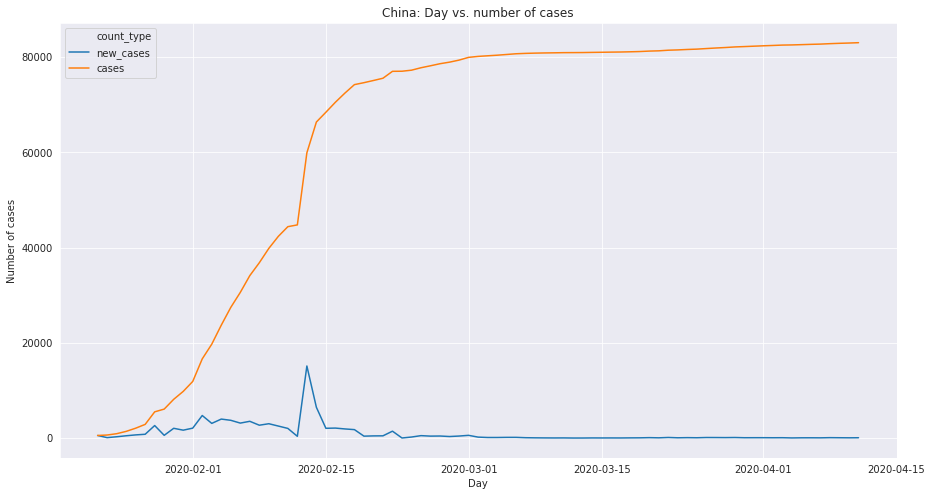

In [13]:
sns.set_style("darkgrid") # Set the plot colors
plt.figure(figsize=(15, 8)) # Set desired dimensions

ax = sns.lineplot(x="date", 
            y="count", 
            data=data,
            hue="count_type")

ax.set(title=f"{country}: Day vs. number of cases",
      xlabel="Day",
      ylabel="Number of cases")

plt.show()

Here is all of that code as a single function. Now we can look at other countries and data types.

In [14]:
def count_per_day_with_daily(country, data_type="cases"):
    
    data = cod.get_data_jhu(data_type=data_type)
    data = data[data["Country/Region"] == country] # Select rows for the country we're looking at
    data = data[["date", data_type]] # We only need these columns
    data = data.groupby("date").aggregate(np.sum) # Sum total cases for each day from all provinces
    data = data.reset_index()
    data.head(10)

    temp_col = list(data[data_type])
    temp_col = [0] + temp_col[:-1] # Offset all value by 1 row
    daily_new_cases = data[data_type] - temp_col
    data.insert(1, f"new_{data_type}", daily_new_cases)
    data.head(10)

    data = data.melt(id_vars="date", var_name="count_type", value_name="count").sort_values(by="date")
    data["count"] = data["count"].apply(pd.to_numeric)
    data.head(10)

    sns.set_style("darkgrid") # Set the plot colors
    plt.figure(figsize=(15, 8)) # Set desired dimensions

    ax = sns.lineplot(x="date", 
                y="count", 
                data=data,
                hue="count_type")

    ax.set(title=f"{country}: Day vs. number of {data_type}",
          xlabel="Day",
          ylabel="Number of {data_type}")

    plt.show()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


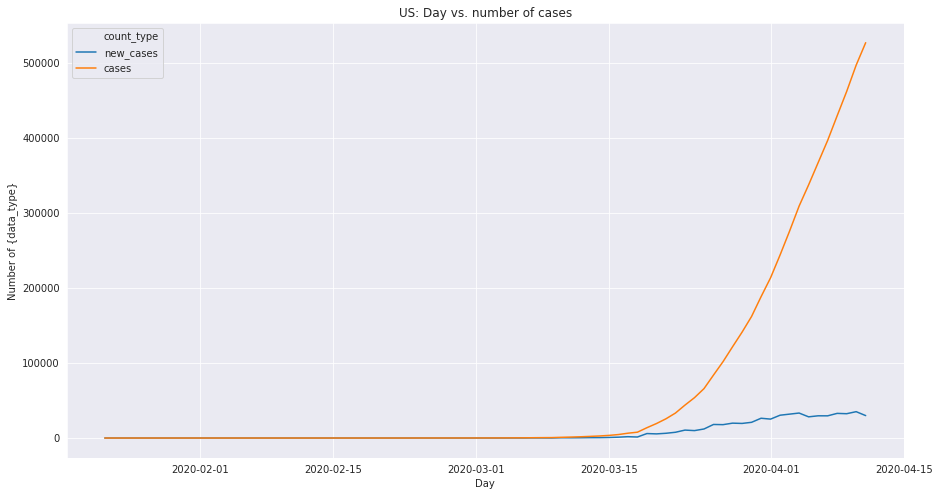

In [17]:
count_per_day_with_daily("US")

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


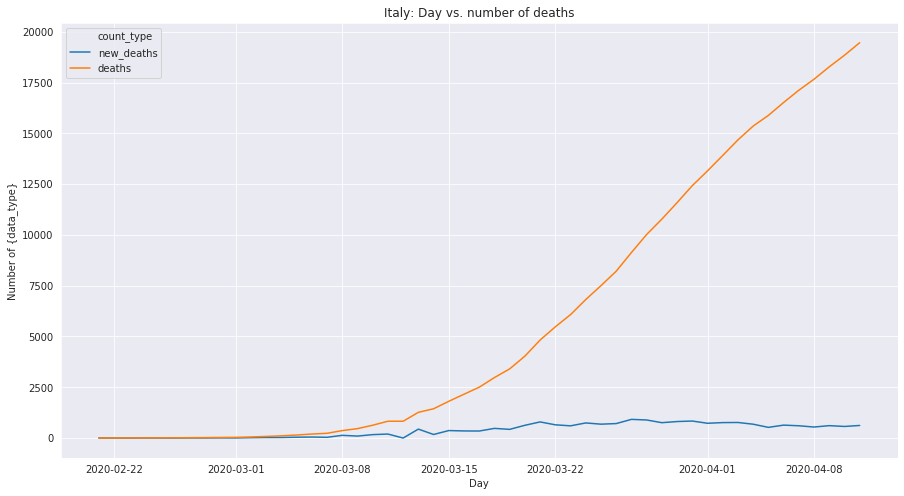

In [16]:
count_per_day_with_daily("Italy", data_type="deaths")